<a href="https://www.kaggle.com/code/ahmedyouseff/plant-diseases-using-cnn?scriptVersionId=121714521" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Import library

In [1]:
import cv2
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
%matplotlib inline

## constants


In [2]:
# constants
IMG_DIM = 224
DATA_PATH = "../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/"

##  Read Dataset

In [52]:
def imread(img_path):
    img = cv2.imread(img_path)
    img = img.astype('float32')
    img = cv2.resize(img, (IMG_DIM, IMG_DIM))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

def imshow(img, figsize=(5, 5)):
    plt.figure(figsize=figsize)
    plt.imshow(img, cmap='gray')
    plt.show()

In [4]:
def create_dataframe(data_path):
    df = []
    for c in os.listdir(data_path):
        class_folder = os.path.join(data_path, c)
        for f in os.listdir(class_folder):
            f_path = os.path.join(class_folder, f)
            
            df.append([f_path, c])
    return pd.DataFrame(df, columns=('filename', 'class'))

In [5]:
df = create_dataframe(os.path.join(DATA_PATH, 'train'))

In [6]:
df

,filename,class
0,../input/new-plant-diseases-dataset/New Plant ...,Tomato___Late_blight
1,../input/new-plant-diseases-dataset/New Plant ...,Tomato___Late_blight
2,../input/new-plant-diseases-dataset/New Plant ...,Tomato___Late_blight
3,../input/new-plant-diseases-dataset/New Plant ...,Tomato___Late_blight
4,../input/new-plant-diseases-dataset/New Plant ...,Tomato___Late_blight
...,...,...
70290,../input/new-plant-diseases-dataset/New Plant ...,Corn_(maize)___healthy
70291,../input/new-plant-diseases-dataset/New Plant ...,Corn_(maize)___healthy
70292,../input/new-plant-diseases-dataset/New Plant ...,Corn_(maize)___healthy
70293,../input/new-plant-diseases-dataset/New Plant ...,Corn_(maize)___healthy


## CLASSES LIST

In [7]:
diseases = os.listdir(DATA_PATH+'train')
diseases
CLASSES = sorted(diseases)
CLASSES


['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

## Create Data Generator

In [8]:
from sklearn.model_selection import train_test_split
df_train, df_val = train_test_split(df, test_size=0.30, random_state=0)

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
train_gen = ImageDataGenerator().flow_from_dataframe(
    df_train,
    target_size=(IMG_DIM, IMG_DIM),
    classes=CLASSES,
    batch_size=128,
)

val_gen = ImageDataGenerator().flow_from_dataframe(
    df_val,
    target_size=(IMG_DIM, IMG_DIM),
    classes=CLASSES,
    shuffle=False,
    batch_size=128,
)

Found 49206 validated image filenames belonging to 38 classes.
Found 21089 validated image filenames belonging to 38 classes.


In [11]:
lable =train_gen.class_indices
lable

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

## Show Sample from data

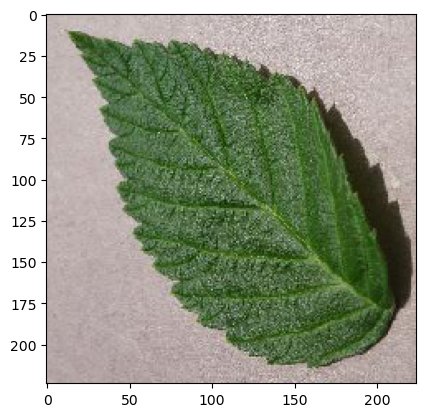

In [44]:
img = train_gen[0][0][2]/255.0
img.dtype
plt.imshow(img)

## Build CNN Model

In [13]:


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAvgPool2D, Dense, Flatten,Dropout
model= Sequential()

model.add(Conv2D(64, 3, input_shape=(IMG_DIM, IMG_DIM, 3), activation='relu'))
model.add(MaxPool2D(2))
model.add(Conv2D(96, 3, activation='relu'))
model.add(MaxPool2D(2))
model.add(Conv2D(128, 3, activation='relu'))
model.add(MaxPool2D(2))
model.add(Conv2D(256, 3, activation='relu'))
model.add(MaxPool2D(2))
model.add(Conv2D(512, 3, activation='relu'))
model.add(MaxPool2D(2))
model.add(Flatten())
#Fully C L
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(38, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
MODEL_PATH = 'saved-models/pdcnn2'

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 96)      55392     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 96)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       110720    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

## Train & Save Modle

In [14]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(MODEL_PATH,
                            save_weights_only=True,
                            save_best_only=True,
                            verbose=1)
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    callbacks=[checkpoint],
)

Epoch 1/10
385/385 [==============================] - ETA: 0s - loss: 2.7075 - accuracy: 0.3015
Epoch 1: val_loss improved from inf to 1.11804, saving model to saved-models/pdcnn2
385/385 [==============================] - 536s 1s/step - loss: 2.7075 - accuracy: 0.3015 - val_loss: 1.1180 - val_accuracy: 0.6805
Epoch 2/10
385/385 [==============================] - ETA: 0s - loss: 1.0974 - accuracy: 0.6735
Epoch 2: val_loss improved from 1.11804 to 0.56562, saving model to saved-models/pdcnn2
385/385 [==============================] - 270s 700ms/step - loss: 1.0974 - accuracy: 0.6735 - val_loss: 0.5656 - val_accuracy: 0.8333
Epoch 3/10
385/385 [==============================] - ETA: 0s - loss: 0.6652 - accuracy: 0.7989
Epoch 3: val_loss improved from 0.56562 to 0.36945, saving model to saved-models/pdcnn2
385/385 [==============================] - 272s 707ms/step - loss: 0.6652 - accuracy: 0.7989 - val_loss: 0.3695 - val_accuracy: 0.8852
Epoch 4/10
385/385 [==============================

## Plot Modle History

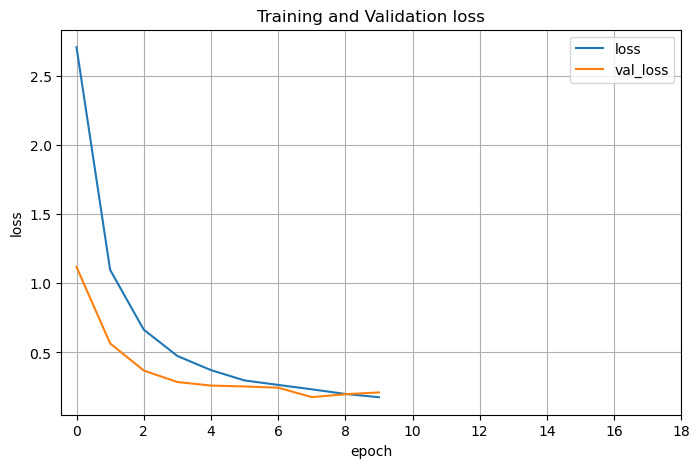

In [15]:
hist_df = pd.DataFrame(history.history)
hist_df.plot(y=['loss', 'val_loss'], figsize=(8, 5))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.grid(axis='both')
plt.xticks(np.arange(0, 20, 2))
plt.show()

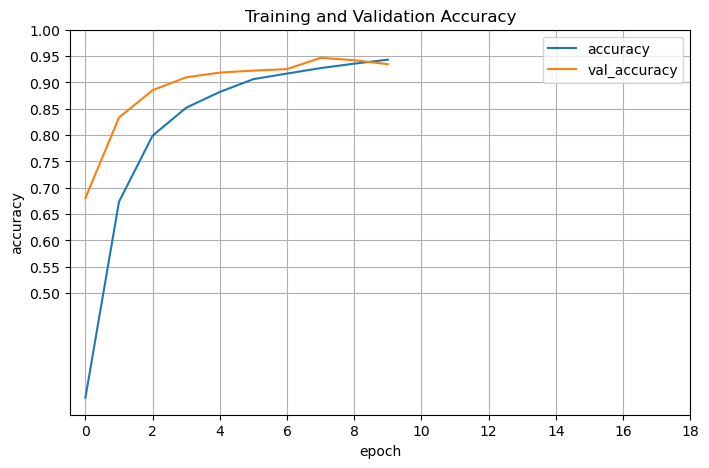

In [16]:
hist_df = pd.DataFrame(history.history)
hist_df.plot(y=['accuracy', 'val_accuracy'], figsize=(8, 5))
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Training and Validation Accuracy')
plt.grid(axis='both')
plt.xticks(np.arange(0, 20, 2))
plt.yticks(np.arange(0.5, 1.01, 0.05))
plt.show()

## Read test data

In [17]:
df_test = create_dataframe(os.path.join(DATA_PATH, 'valid'))


In [18]:
test_gen = ImageDataGenerator().flow_from_dataframe(
    df_test,
    target_size=(IMG_DIM, IMG_DIM),
    classes=CLASSES,
    shuffle=False,
    batch_size=128,
)

Found 17572 validated image filenames belonging to 38 classes.


## Test Modle & Loading best weights

In [19]:
print(MODEL_PATH)
model.load_weights(MODEL_PATH)
model.evaluate(test_gen)

saved-models/pdcnn2
138/138 [==============================] - 137s 992ms/step - loss: 0.1787 - accuracy: 0.9460


[0.17865940928459167, 0.9459936022758484]

# Analyzing & Test model


In [20]:
dft=create_dataframe(os.path.join("/kaggle/input/new-plant-diseases-dataset/test/"))

In [21]:
dft

,filename,class
0,/kaggle/input/new-plant-diseases-dataset/test/...,test
1,/kaggle/input/new-plant-diseases-dataset/test/...,test
2,/kaggle/input/new-plant-diseases-dataset/test/...,test
3,/kaggle/input/new-plant-diseases-dataset/test/...,test
4,/kaggle/input/new-plant-diseases-dataset/test/...,test
5,/kaggle/input/new-plant-diseases-dataset/test/...,test
6,/kaggle/input/new-plant-diseases-dataset/test/...,test
7,/kaggle/input/new-plant-diseases-dataset/test/...,test
8,/kaggle/input/new-plant-diseases-dataset/test/...,test
9,/kaggle/input/new-plant-diseases-dataset/test/...,test


In [22]:
dft_gen = ImageDataGenerator().flow_from_dataframe(
    dft,
    target_size=(IMG_DIM, IMG_DIM),
)

Found 33 validated image filenames belonging to 1 classes.


### Saliency maps

In [23]:
import tensorflow as tf

def saliency_map(img):
    
    plt.imshow(img/255.0)
    plt.show()
   


    x = tf.Variable(np.expand_dims(img, 0), dtype='float32')

    with tf.GradientTape() as tape:
        result = model(x)
        y = result[:, np.argmax(result)]
        grads = tape.gradient(y, x)

    grads_2d = grads.numpy()[0].max(axis=2)
    grads_2d_norm = (grads_2d - grads_2d.min())/(grads_2d.max() - grads_2d.min())

    grads_2d_uint8 = (grads_2d_norm*255.0).astype('uint8')
    _, grads_2d_bin = cv2.threshold(grads_2d_uint8, 0, 255, cv2.THRESH_OTSU)
    plt.imshow(grads_2d_bin, cmap='gray')
    plt.show()
    
    print(CLASSES[np.argmax(result)])

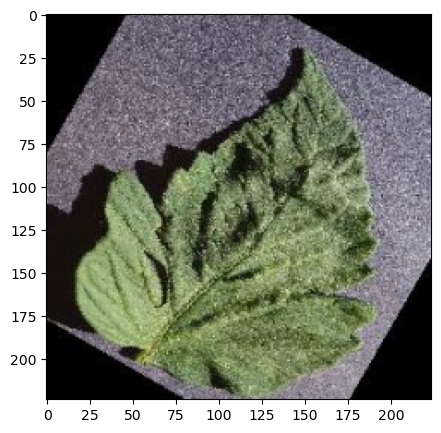

(224, 224, 3)

In [78]:
img_path = '//kaggle/input/new-plant-diseases-dataset/test/test/TomatoHealthy3.JPG'
img3 = imread(img_path)
imshow(img3/255.0)
img2.shape

In [48]:
img2 = dft_gen[0][0][5]

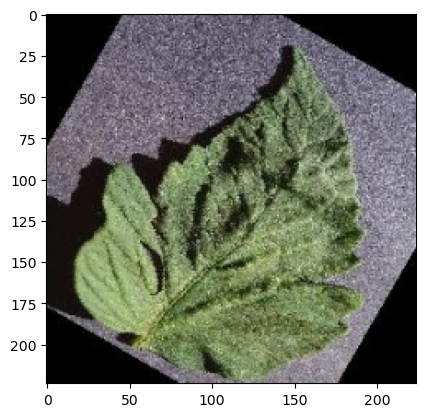

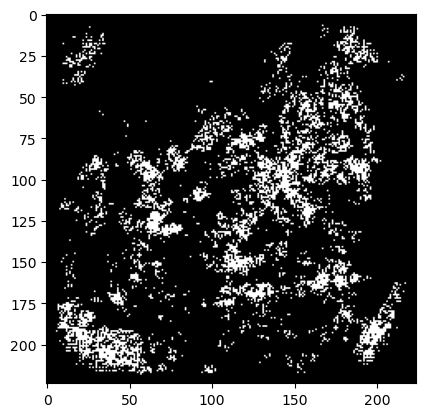

Tomato___healthy


In [79]:
saliency_map(img3)


In [77]:
y_r=model.predict(np.expand_dims(img3, 0))
CLASSES[np.argmax(y_r)]


1/1 [==============================] - 0s 37ms/step


'Tomato___healthy'

## Save in TFlite format

In [63]:
TF_LITE_MODEL_FILE_NAME = "plant DiseasesV2.tflite"

In [64]:
import tensorflow as tf

tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = tf_lite_converter.convert()

In [65]:
tflite_model_name = TF_LITE_MODEL_FILE_NAME
open(tflite_model_name, "wb").write(tflite_model)

19725644

In [66]:
def convert_bytes(size, unit=None):
    if unit == "KB":
        return print('File size: ' + str(round(size / 1024, 3)) + ' Kilobytes')
    elif unit == "MB":
        return print('File size: ' + str(round(size / (1024 * 1024), 3)) + ' Megabytes')
    else:
        return print('File size: ' + str(size) + ' bytes')

In [67]:
def get_file_size(file_path):
    size = os.path.getsize(file_path)
    return size
     

In [68]:
convert_bytes(get_file_size(TF_LITE_MODEL_FILE_NAME), "KB")

File size: 19263.324 Kilobytes
